In [2]:
import os.path as path
import raw_data_preprocessing as rdp
import warnings

warnings.filterwarnings('ignore')

googledrive_loc = '/datasets/yis-google-drive'
data_folder_loc = 'Yi_UCI_research/GSR other works/2020 Summer_predict individual training/data/saved data/2022/April/kmeans_binary'
data_path = path.join(googledrive_loc, data_folder_loc)

import classification as clf
X, Y, orig_len, feature_names, x_test, y_test = clf.read_inputs(data_path,['train_x.array','train_y.array','original_len.int','feature_names.list', 'test_x.array', 'test_y.array'])
print('The input and output shape: {} and {}'.format(X.shape, Y.shape))

The input and output shape: (684, 51) and (684,)


## Model selection

In [3]:
classify_test = clf.ClassificationProcessor(X, Y, orig_len, feature_names)

Decision Tree Accuracy: 0.838 (0.029)


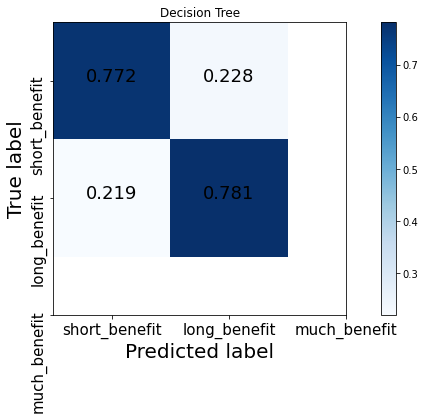

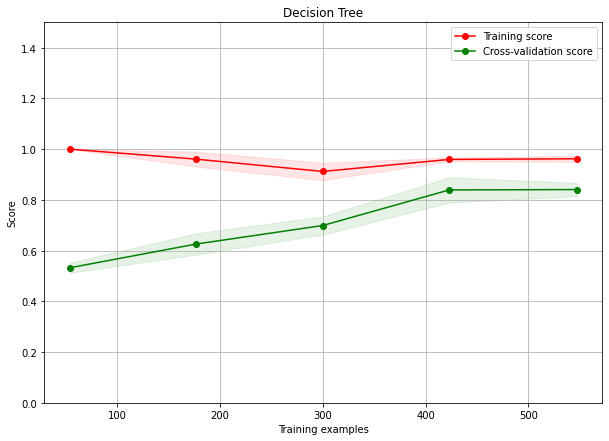

Decision Tree: got error: Traceback (most recent call last):
  File "/work/IndividualDifference/classification.py", line 121, in model_selection
    self.train_evaluate_model(name, clf, skf, self.X[:, 0:feature_num], self.Y, True)
  File "/work/IndividualDifference/classification.py", line 115, in train_evaluate_model
    return cfm[0][0]/cfm[0].sum(), cfm[1][1]/cfm[1].sum(), cfm[2][2]/cfm[2].sum(), accuracies, pred_y, prob_y # return acc for class 0,1,2
IndexError: index 2 is out of bounds for axis 0 with size 2

Random Forest Accuracy: 0.895 (0.025)


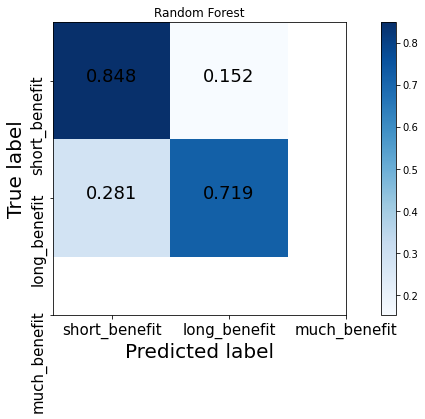

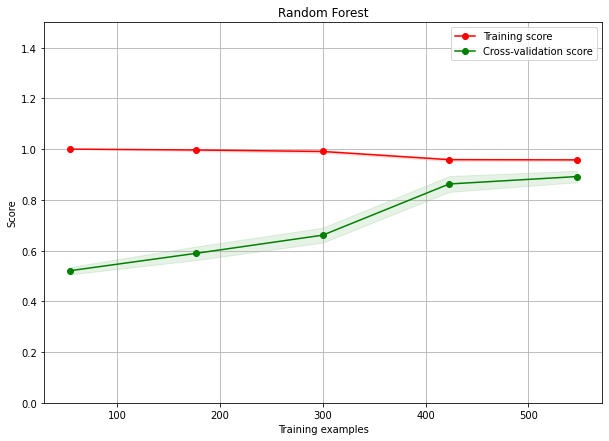

Random Forest: got error: Traceback (most recent call last):
  File "/work/IndividualDifference/classification.py", line 121, in model_selection
    self.train_evaluate_model(name, clf, skf, self.X[:, 0:feature_num], self.Y, True)
  File "/work/IndividualDifference/classification.py", line 115, in train_evaluate_model
    return cfm[0][0]/cfm[0].sum(), cfm[1][1]/cfm[1].sum(), cfm[2][2]/cfm[2].sum(), accuracies, pred_y, prob_y # return acc for class 0,1,2
IndexError: index 2 is out of bounds for axis 0 with size 2

MLP Accuracy: 0.899 (0.024)


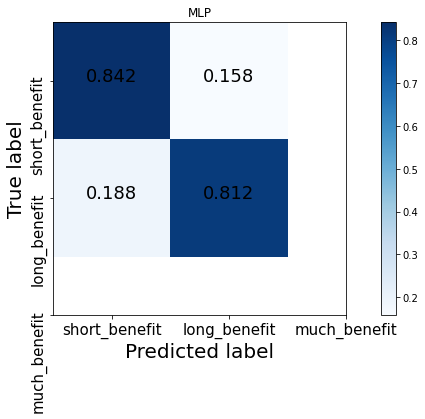

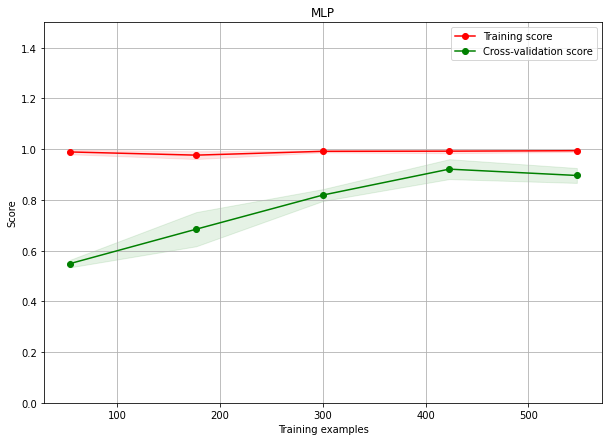

MLP: got error: Traceback (most recent call last):
  File "/work/IndividualDifference/classification.py", line 121, in model_selection
    self.train_evaluate_model(name, clf, skf, self.X[:, 0:feature_num], self.Y, True)
  File "/work/IndividualDifference/classification.py", line 115, in train_evaluate_model
    return cfm[0][0]/cfm[0].sum(), cfm[1][1]/cfm[1].sum(), cfm[2][2]/cfm[2].sum(), accuracies, pred_y, prob_y # return acc for class 0,1,2
IndexError: index 2 is out of bounds for axis 0 with size 2

Linear SVM Accuracy: 0.654 (0.027)


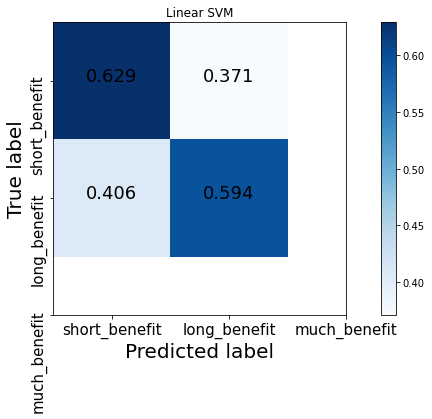

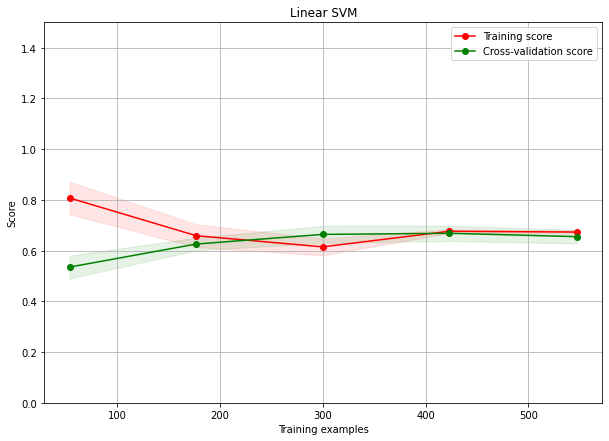

Linear SVM: got error: Traceback (most recent call last):
  File "/work/IndividualDifference/classification.py", line 121, in model_selection
    self.train_evaluate_model(name, clf, skf, self.X[:, 0:feature_num], self.Y, True)
  File "/work/IndividualDifference/classification.py", line 115, in train_evaluate_model
    return cfm[0][0]/cfm[0].sum(), cfm[1][1]/cfm[1].sum(), cfm[2][2]/cfm[2].sum(), accuracies, pred_y, prob_y # return acc for class 0,1,2
IndexError: index 2 is out of bounds for axis 0 with size 2

RBF SVM Accuracy: 0.940 (0.016)


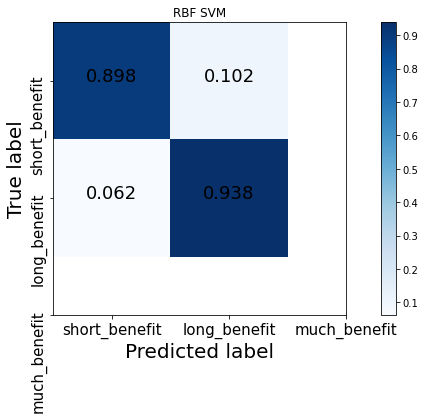

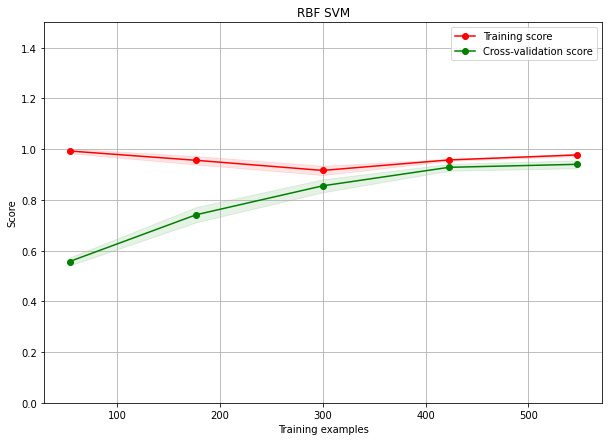

RBF SVM: got error: Traceback (most recent call last):
  File "/work/IndividualDifference/classification.py", line 121, in model_selection
    self.train_evaluate_model(name, clf, skf, self.X[:, 0:feature_num], self.Y, True)
  File "/work/IndividualDifference/classification.py", line 115, in train_evaluate_model
    return cfm[0][0]/cfm[0].sum(), cfm[1][1]/cfm[1].sum(), cfm[2][2]/cfm[2].sum(), accuracies, pred_y, prob_y # return acc for class 0,1,2
IndexError: index 2 is out of bounds for axis 0 with size 2

GDBT Accuracy: 0.947 (0.014)


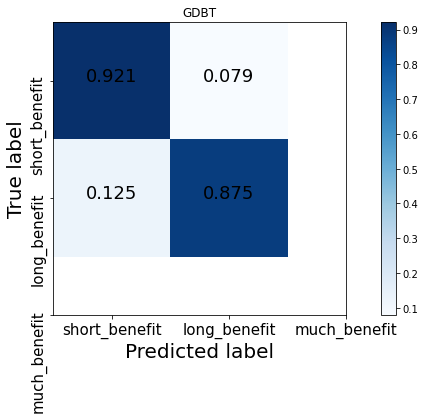

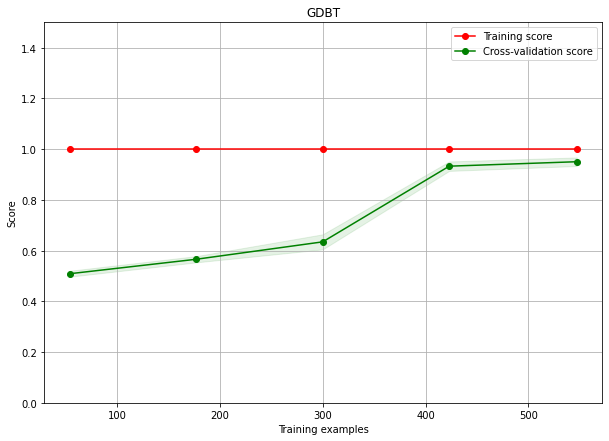

GDBT: got error: Traceback (most recent call last):
  File "/work/IndividualDifference/classification.py", line 121, in model_selection
    self.train_evaluate_model(name, clf, skf, self.X[:, 0:feature_num], self.Y, True)
  File "/work/IndividualDifference/classification.py", line 115, in train_evaluate_model
    return cfm[0][0]/cfm[0].sum(), cfm[1][1]/cfm[1].sum(), cfm[2][2]/cfm[2].sum(), accuracies, pred_y, prob_y # return acc for class 0,1,2
IndexError: index 2 is out of bounds for axis 0 with size 2



In [4]:
classify_test.model_selection(15)

In [ ]:
#classify_test.exhausive_feature_selection('GDBT')
# classify_test.exhausive_feature_selection('Random Forest')
# classify_test.feature_selection('Random Forest')

## Final model

In [5]:
classify_binary = clf.ClassificationProcessor(X[:,0:15], Y, orig_len, feature_names[0:15])

In [6]:
NAMES = ['Decision Tree','Random Forest', 'MLP', "Linear SVM", "RBF SVM", 'GDBT']
for i in NAMES:
    final_model = classify_binary.models[i]
    classify_binary.final_model(final_model, x_test[:,0:15], y_test)

[[72 14]
 [ 6  2]]
[[86  0]
 [ 8  0]]
[[86  0]
 [ 8  0]]
[[84  2]
 [ 8  0]]
[[86  0]
 [ 8  0]]
[[86  0]
 [ 8  0]]


In [ ]:
fff

shap

[0.33333333 0.33333333 0.33333333]


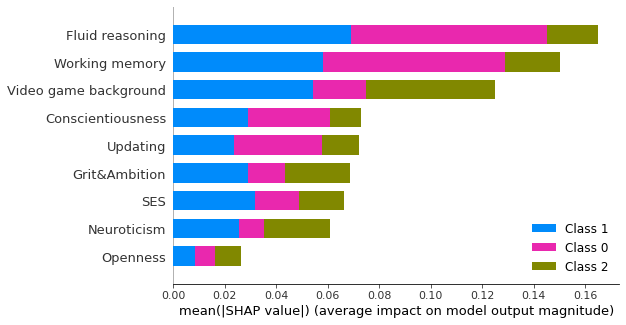

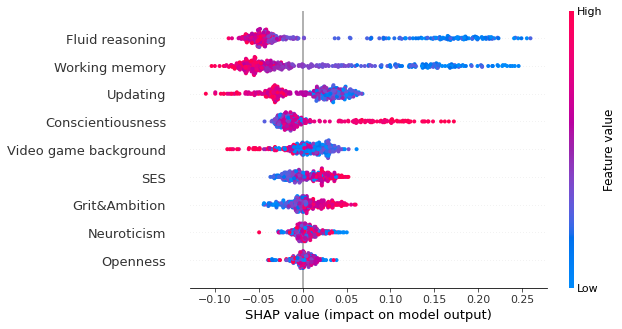

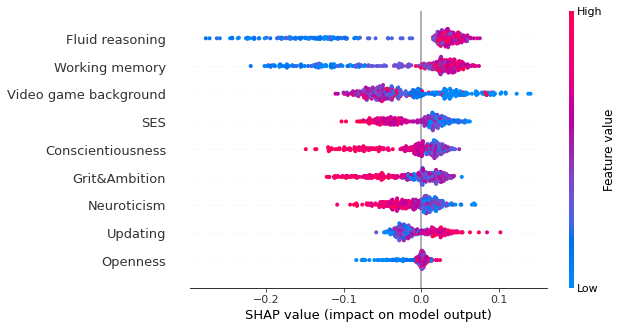

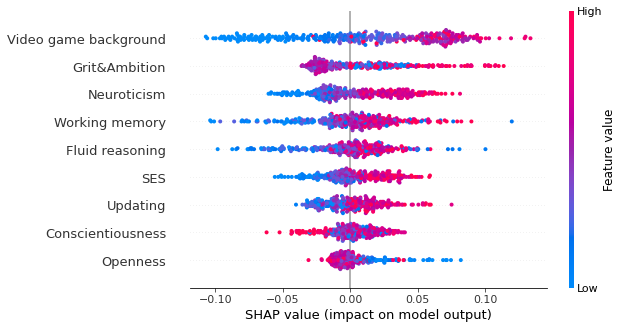

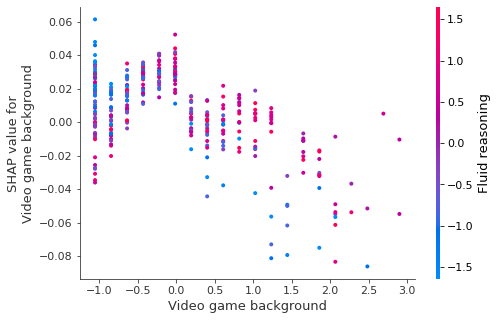

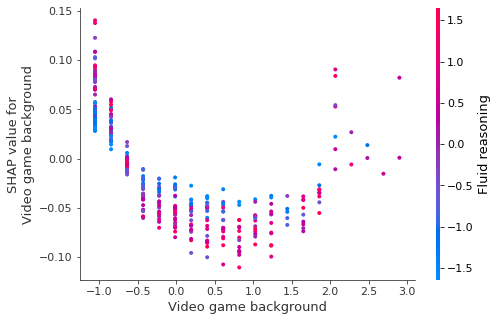

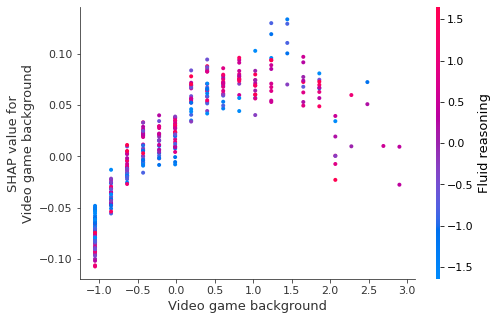

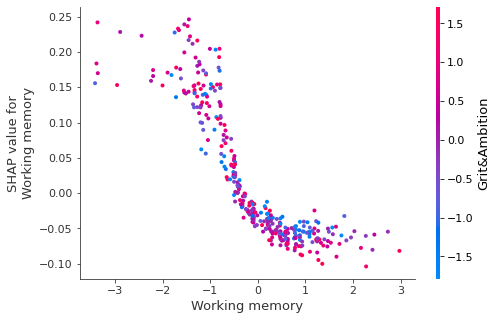

In [ ]:
classify_test.shap_tree('Random Forest',data_path)

In [ ]:
# shap_all, expected_shap = clf.read_inputs(data_path,['shap_values.data','shap_expected.data'])
# classify_test.shap_visualize(shap_all, expected_shap, final_accuracies, final_pred_y, False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5c9e1ba2-0cb9-40ed-a01b-b56de82eb464' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>